# Linear Regression

Linear regression algorithm is the most interpretable Machine Learning algorithm available for analyzing linear relationships between features and target variables.

Equation of Linear Regression:

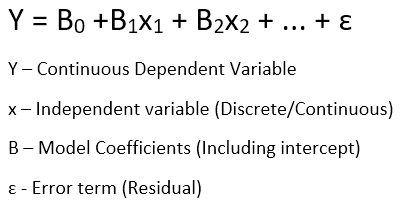

Main objective of linear regression is to identify the best fit regression line that minimizes error term, ɛ.

Model coefficients for <b>simple linear regression</b> are estimated using ordinary least squares (OLS) method by minimizing the sum of squared residuals as follows:

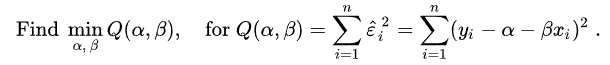

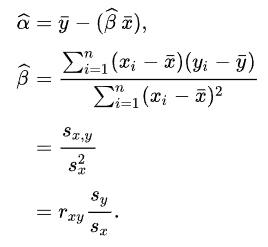

For <b>multiple linear regression</b>, gradient descent algorithm (continuous learning until threshold is reached) is used for estimating model coefficients as follows:

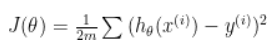

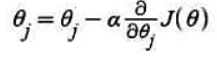

<img src="https://raw.githubusercontent.com/satishgunjal/Images/master/gradient_descent_formula_n_features.PNG" width="400">

<img src ="https://www.statology.org/wp-content/uploads/2020/12/residuals2.png" width="500">

One main drawback of gradient descent algorithm is the value of cost function may not be able to converge to local minima due to existence of plateaus or very high learning rate.

Methods to overcome failure to converge to local minima point:
1. Feature Selection
2. Learning rate scheduling (varying learning rate)
3. Changing initialization method
4. Using advance optimization methods

<b>Note that more details about gradient descent algorithm will be covered in Deep Learning modules</b>.

<b>Assumptions of Linear Regression</b>:
1. Linear in terms of coefficient and residuals
2. Zero correlation between residuals
3. Exogeneity: Features are uncorrelated with residuals
4. Homoskedasticity: Residuals have constant variance
5. No multicollinearity: Features are uncorrelated with one another
6. Residuals are normally distributed with zero mean

<b>Requirement of feature scaling: Yes</b>

<b>Robust to outliers: No</b>

<b>Advantages of Linear Regression:</b>
1. Model coefficients easy to interpret
2. Suitable to use for datasets with linear relationships
3. Model can be regularized to prevent model overfitting

<b>Disadvantages of Linear Regression:</b>
1. Model performance may be impacted by outliers
2. Model may be too simplistic, which may not be able to capture complex relationships between variables

<b>Time complexity of model training: O(np^2 + p^3)</b>

<b>Time complexity of model prediction: O(p)</b>

<b>Space complexity of model prediction: O(p)</b>

- n - Number of training samples

- p - Number of features

## R-squared vs Adjusted R-squared

R-squared statistic is a measure of goodness of fit of variables on regression model.

<b>Formula of R-squared</b>:

<img src ="https://miro.medium.com/max/1200/1*_HbrAW-tMRBli6ASD5Bttw.png" width="500">

The value of R-squared is usually between 0 and 1, which indicates the closer the value of R-squared to 1, the better the regression model fits the data and vice versa.

R-squared value is mostly suitable for model evaluation on linear regression models with only <b>one feature</b>.

One major disadvantage of R-squared is that including more features in regression model will lead to higher R-squared value, which misleads the performance of regression models. Including features that are insignificant in regression models may actually worsen its performance instead (overfitting)

An alternative to overcome the issue of using R-squared statistic for model evaluation is using Adjusted R-squared statistic.

Adjusted R-squared statistic penalizes excessive use of independent features that don't correlate with target variables, which can be used as part of feature selection with wrapper methods (i.e. forward/backward selection).

<b>Formula of Adjusted R-squared</b>:

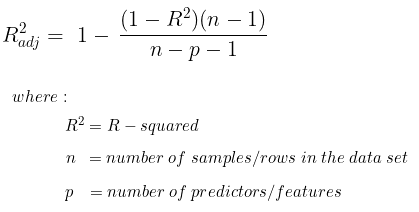

Similar to R-squared, the value of adjusted R-squared is usually between 0 and 1, which indicates the closer its value to 1, the better the regression model fits the data and vice versa.

For linear regression with multiple features, adjusted R-squared is the preferred choice for model evaluation over R-squared.

## Interpretation of regression coefficients

For regression models, coefficients in multiple linear regression models represent the relationship between given feature and target, assuming that all other features remain constant (<b>conditional dependence</b>).

Interpretation:
1. For continuous features, a unit increase in independent feature is associated with n unit increase or decrease in target value.

2. For categorical features, if target value increase or decrease by n units, it is considered as a specific category.

Note that coefficient interpretation for feature selection requires extra caution by <b>multiplying the coefficients by the standard deviation</b> of the related feature. This would ensure coefficient interpretation for feature selection happens at the same unit of measure. 

## Regularization

Regularization in regression models reduce model overfitting by adding shrinkage penalty to cost function.

There are three types of regularization models:

1. LASSO (Least Absolute Shrinkage & Selection Operator)

2. Ridge

3. ElasticNet

Note that these regularized models should be used only on the training set. For evaluating model performance on validation and test set, unregularized performance measures should be used instead.

### LASSO Regression

Cost function of LASSO regression (l1 penalty):

<img src ="https://www.analyticsvidhya.com/wp-content/uploads/2016/01/eq8-1.png" width="500">

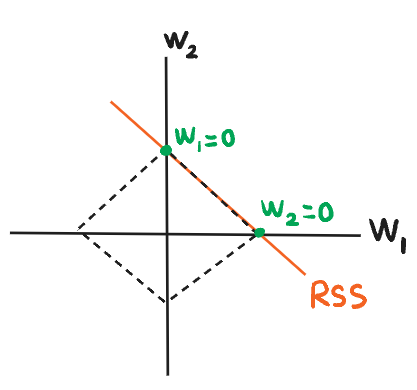

Lambda value controls bias-variance tradeoff to prevent model overfitting/underfitting.

For large values of lambda (tuning parameter), LASSO regression shrinks coefficients of features to exactly zero, which is suitable for feature selection.

Values of lambda are selected using cross-validation methods (i.e. LassoCV) by minimizing cross validation error from a set of lambda values

### Ridge Regression

Cost function of Ridge regression (l2 penalty):

<img src ="https://www.analyticsvidhya.com/wp-content/uploads/2016/01/eq5-1.png" width="500">

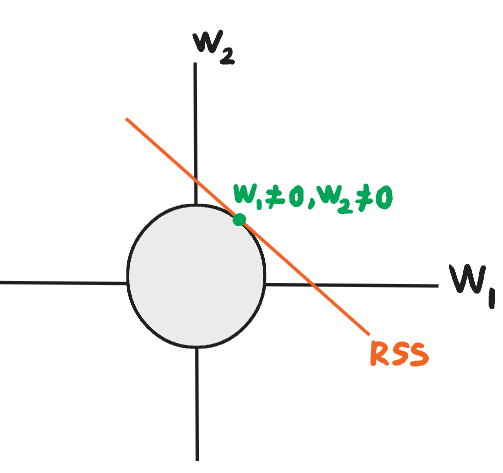

Ridge regression shrinks coefficients of features with little contribution but huge weights close to zero, but not exactly zero.

Values of lambda are selected using cross-validation methods (i.e. RidgeCV) by minimizing cross validation error from a set of lambda values

### ElasticNet Regression

Cost function of ElasticNet regression (Mixture between l1 and l2 penalty):

<img src ="https://miro.medium.com/max/1400/1*lmQmZR8RasogGb_rKCQV-w.png" width="500">

Mixing parameter, α controls the proportion of weights to use between LASSO and Ridge.

α = 0 indicates Ridge regression, while α = 1 indicates LASSO regression.

Values of lambda are selected using cross-validation methods (i.e. ElasticNetCV) by minimizing cross validation error from a set of lambda values

## Linear Regression Example

Refer to the following documentation for more details about the use of Linear Regression on sklearn library:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

The following example below illustrates the process of creating a linear regression model using sklearn library after feature engineering.

In [1]:
# Importing all required libraries for this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets import fetch_california_housing
import missingno
import feature_engine.transformation as fet
import feature_engine.outliers as feo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PowerTransformer, StandardScaler, PolynomialFeatures
import feature_engine.wrappers as few
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNetCV, ElasticNet
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import acorr_ljungbox
from feature_engine.selection import DropCorrelatedFeatures

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

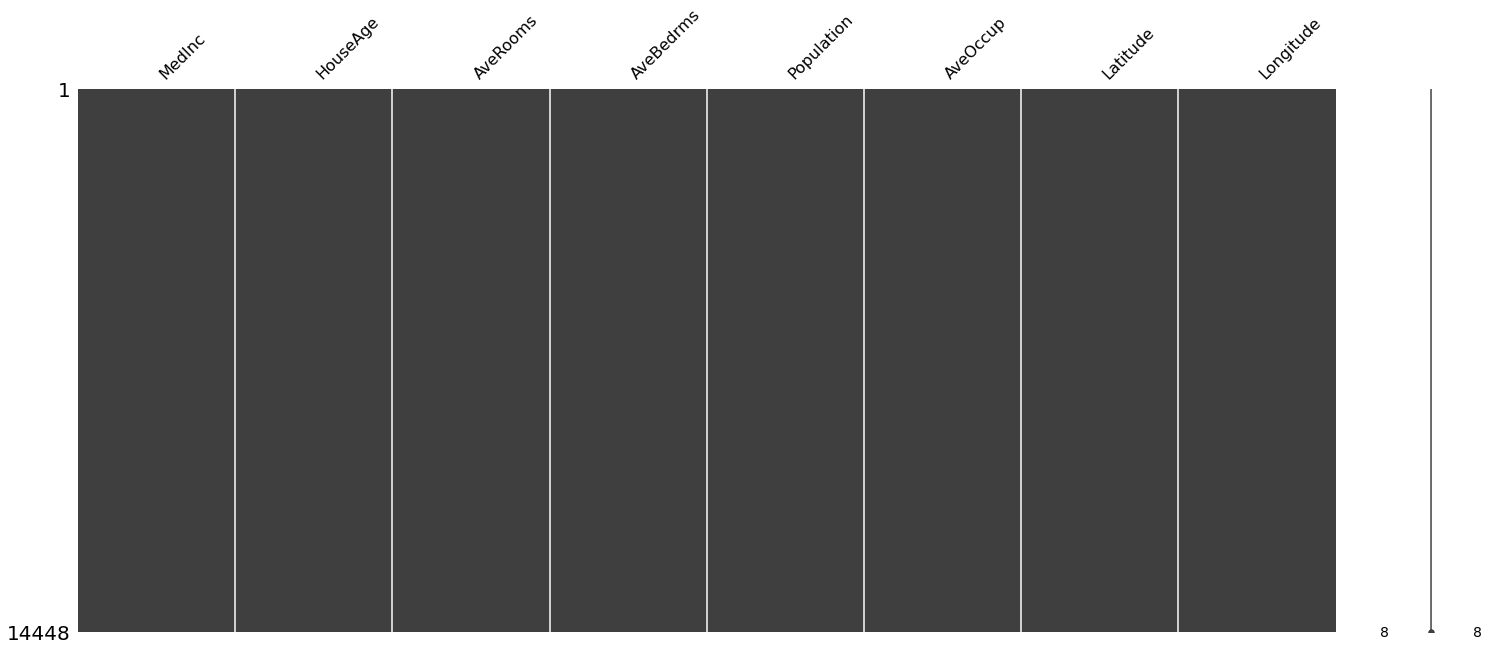

In [6]:
# Checking for missing values of features if exist
missingno.matrix(X_train)
plt.show()

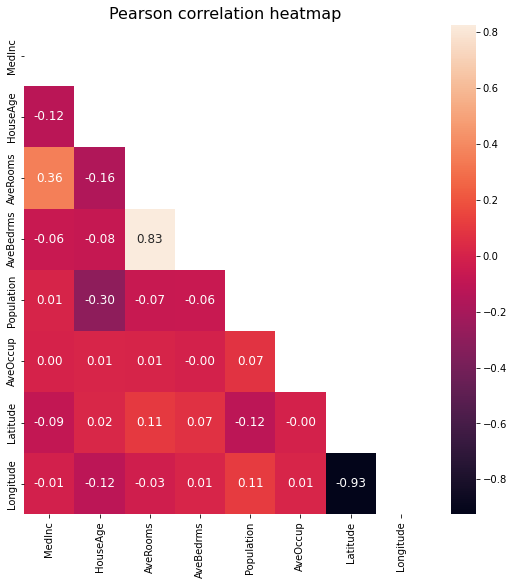

In [7]:
# Pearson correlation heatmap
correlation = X_train.corr(method='pearson')
plt.figure(figsize=(9,9))
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation, dtype=bool)),fmt='.2f',annot_kws={'fontsize':12})
plt.title('Pearson correlation heatmap',size=16)
plt.show()

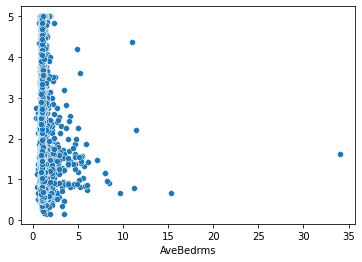

In [8]:
# Scatterplot for AveRooms vs AveBedrms
sns.scatterplot(x = X_train['AveBedrms'],y = y_train)
plt.show()

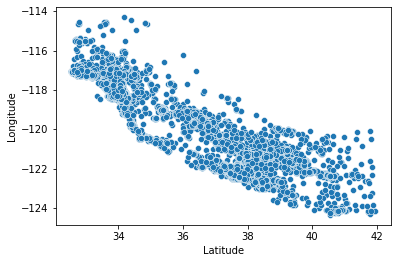

In [9]:
# Scatterplot for Latitude vs Longitude
sns.scatterplot(x = X_train['Latitude'],y = X_train['Longitude'])
plt.show()

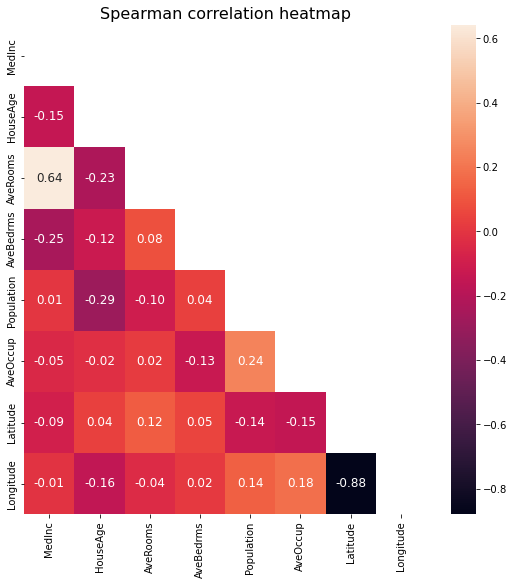

In [10]:
# Spearman correlation heatmap
correlation = X_train.corr(method='spearman')
plt.figure(figsize=(9,9))
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation, dtype=bool)),fmt='.2f',annot_kws={'fontsize':12})
plt.title('Spearman correlation heatmap',size=16)
plt.show()

From both scatterplots and correlation heatmaps, there is a very strong correlation between latitude and longitude according to both pearson and spearman correlation method. Either longitude and latitude variable can be removed from the dataset to avoid multicollinearity problem.

In [11]:
X_train_sub = X_train.drop('Longitude',axis=1)
X_test_sub = X_test.drop('Longitude',axis=1)
X_train_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 1989 to 2732
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      14448 non-null  float64
 1   HouseAge    14448 non-null  float64
 2   AveRooms    14448 non-null  float64
 3   AveBedrms   14448 non-null  float64
 4   Population  14448 non-null  float64
 5   AveOccup    14448 non-null  float64
 6   Latitude    14448 non-null  float64
dtypes: float64(7)
memory usage: 903.0 KB


In [12]:
# Checking for gaussian distribution of numerical variables using anderson test
gaussian_columns = []
non_gaussian_columns = []
for column in X_train_sub.columns:
    result = st.anderson(X_train_sub[column])
    if result[0] > result[1][2]:
        non_gaussian_columns.append(column)
    else:
        gaussian_columns.append(column)
print(f"List of gaussian variables: {gaussian_columns}")
print(f"List of non-gaussian variables: {non_gaussian_columns}")

List of gaussian variables: []
List of non-gaussian variables: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude']


In [13]:
# Checking proportion of outliers
outlier_prop = []
for column in non_gaussian_columns:
    Q1 = X_train_sub[column].quantile(0.25)
    Q3 = X_train_sub[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_prop.append(np.round(len(X_train_sub[(X_train_sub[column] < lower_bound) | (X_train_sub[column] > upper_bound)])/len(X_train_sub),4))
results = pd.concat([pd.Series(X_train_sub[non_gaussian_columns].columns),pd.Series(outlier_prop)],axis=1)\
            .rename({0:'Variable',1:'Prop_Outliers'},axis=1)
results.sort_values(by='Prop_Outliers',ascending=False).head(10)

,Variable,Prop_Outliers
3,AveBedrms,0.0688
4,Population,0.0572
5,AveOccup,0.0342
0,MedInc,0.0334
2,AveRooms,0.0264
1,HouseAge,0.0000
6,Latitude,0.0000


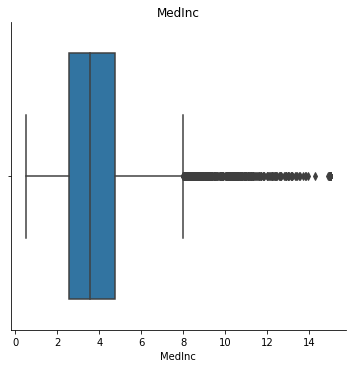

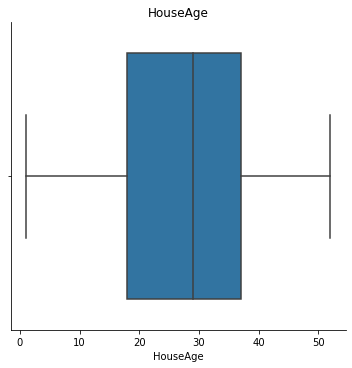

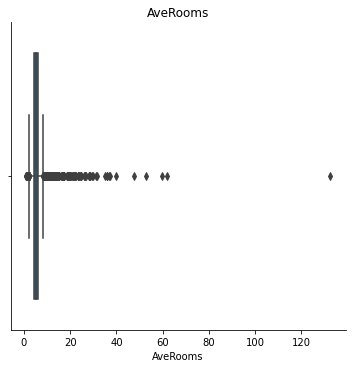

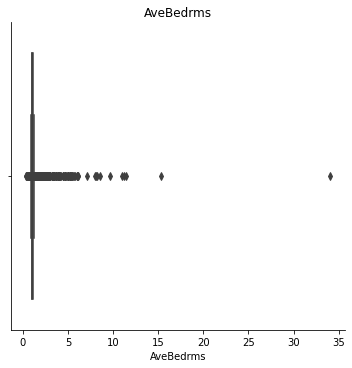

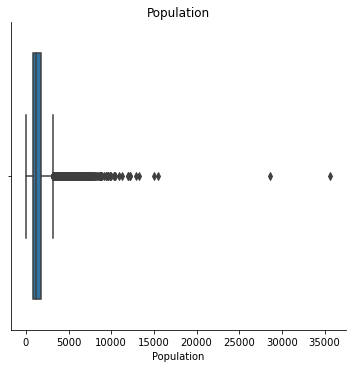

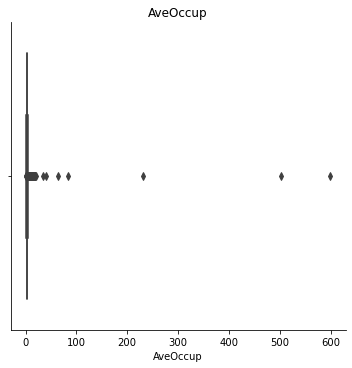

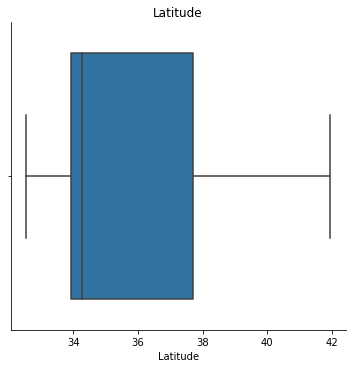

In [14]:
# Visualization of distribution of variables
for column in non_gaussian_columns:
    sns.catplot(data=X_train_sub, x=column, kind='box')
    plt.title(column)
    plt.show()

Since proportion of outliers for all variables are less than 10%, these outliers can be removed for comparison of regression models with vs without outliers.

In [15]:
# Trimming outliers using IQR method
X_train_no_outliers = X_train_sub.copy()
X_test_no_outliers = X_test_sub.copy()
trimmer = feo.OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5)
X_train_no_outliers[non_gaussian_columns] = trimmer.fit_transform(X_train_no_outliers[non_gaussian_columns])
X_test_no_outliers[non_gaussian_columns] = trimmer.transform(X_test_no_outliers[non_gaussian_columns])
index_values = X_train_no_outliers.dropna().index
X_train_no_outliers = X_train_no_outliers.dropna().reset_index(drop=True)
y_train_no_outliers = y_train[index_values].copy().reset_index(drop=True)
index_values = X_test_no_outliers.dropna().index
X_test_no_outliers = X_test_no_outliers.dropna().reset_index(drop=True)
y_test_no_outliers = y_test[index_values].copy().reset_index(drop=True)

In [16]:
X_train_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11797 entries, 0 to 11796
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      11797 non-null  float64
 1   HouseAge    11797 non-null  float64
 2   AveRooms    11797 non-null  float64
 3   AveBedrms   11797 non-null  float64
 4   Population  11797 non-null  float64
 5   AveOccup    11797 non-null  float64
 6   Latitude    11797 non-null  float64
dtypes: float64(7)
memory usage: 645.3 KB


In [17]:
y_train_no_outliers.describe()

count    11797.000000
mean         2.015636
std          1.067736
min          0.175000
25%          1.200000
50%          1.809000
75%          2.580000
max          5.000010
dtype: float64

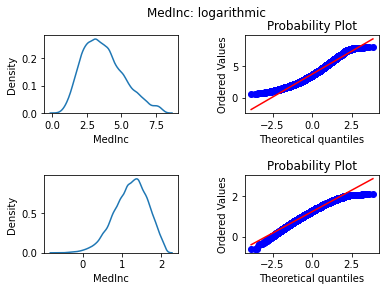

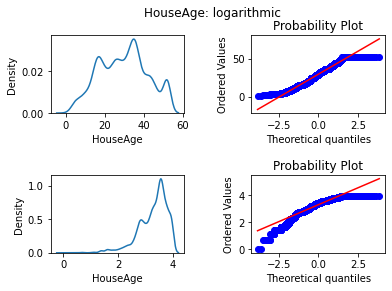

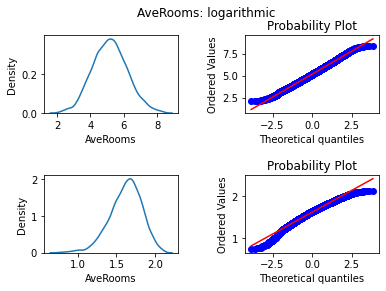

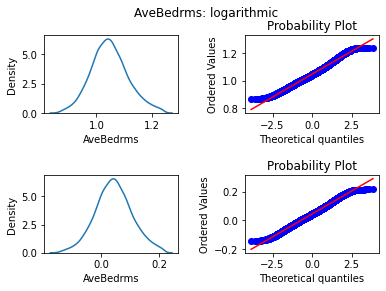

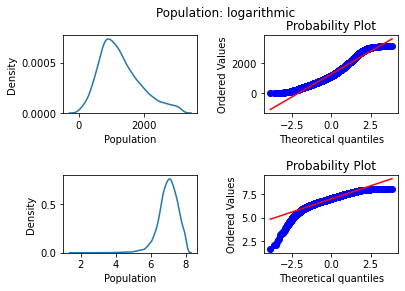

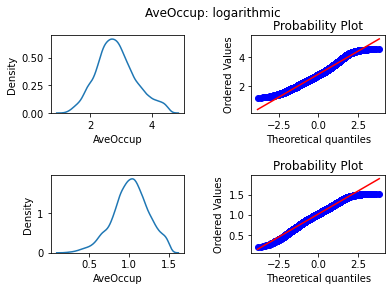

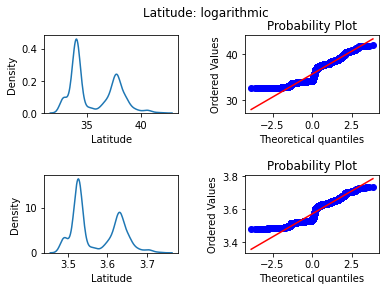

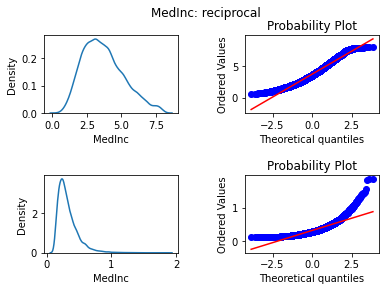

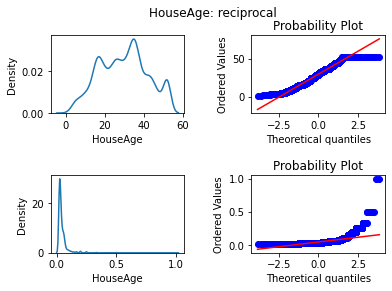

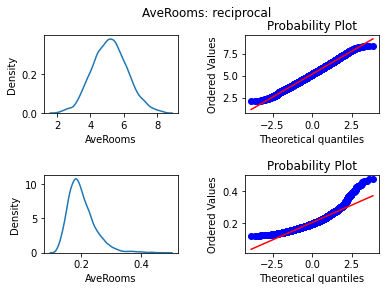

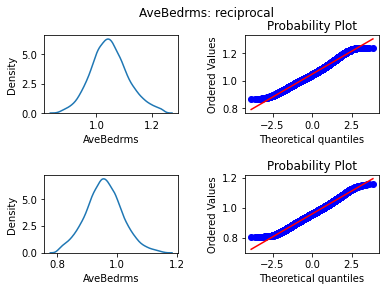

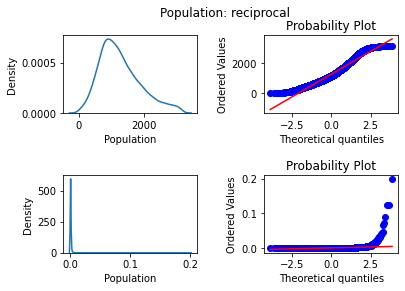

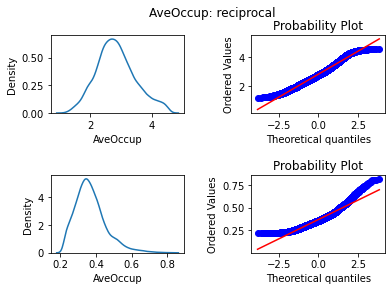

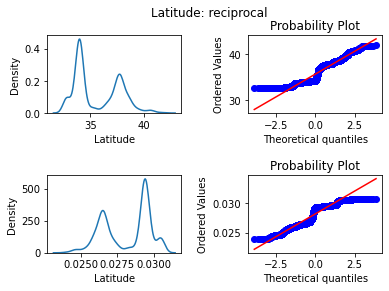

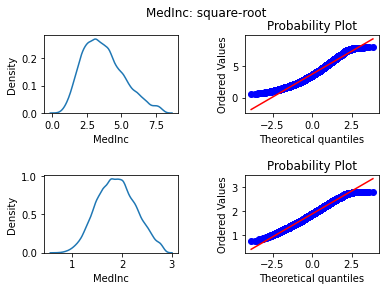

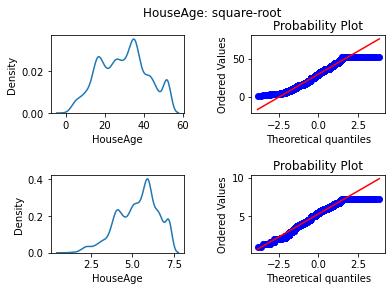

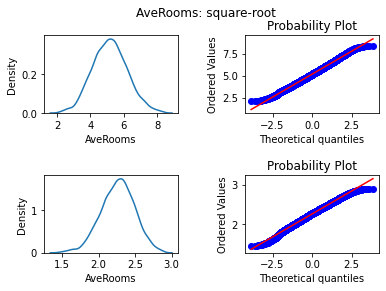

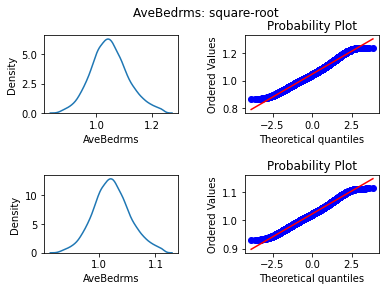

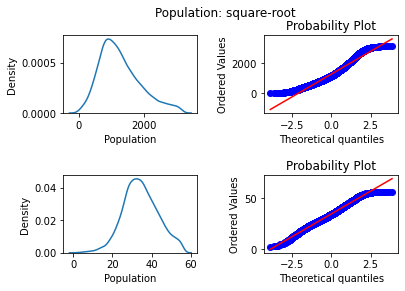

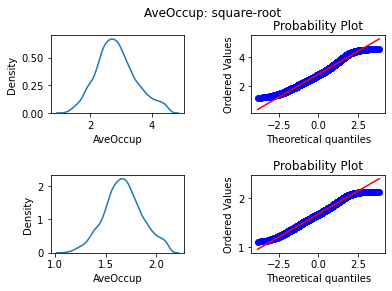

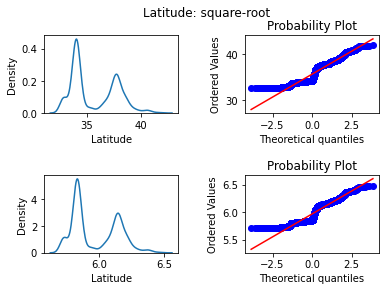

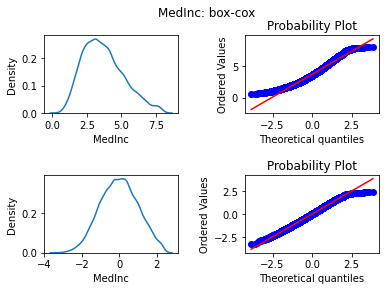

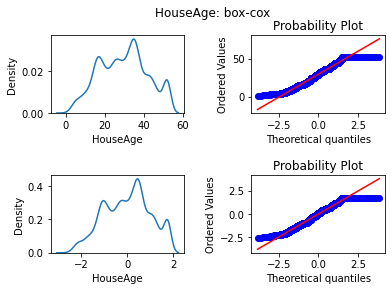

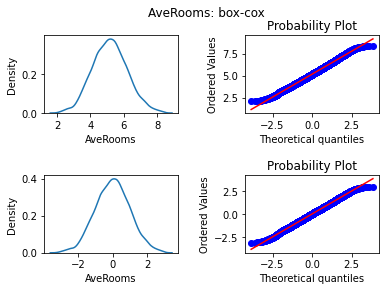

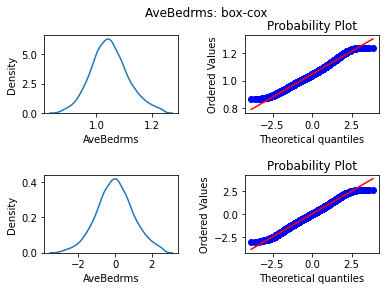

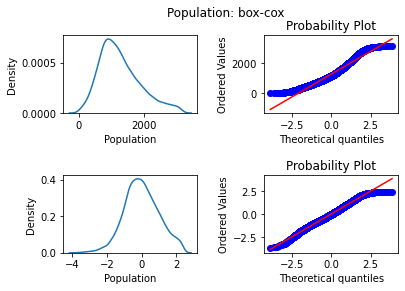

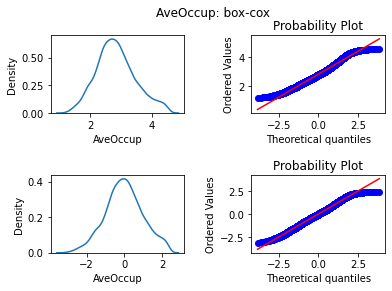

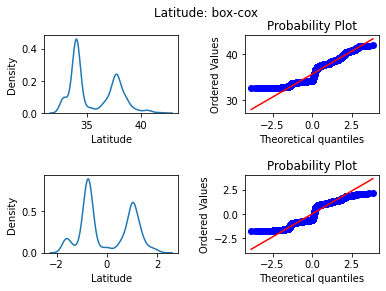

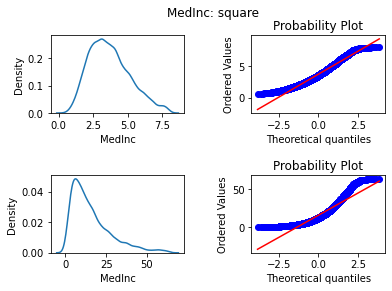

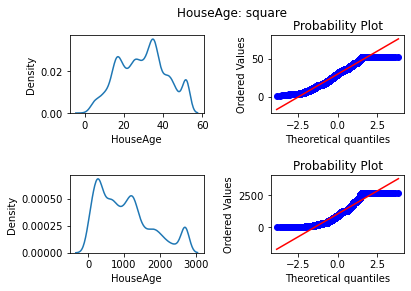

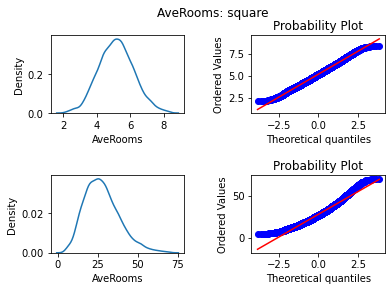

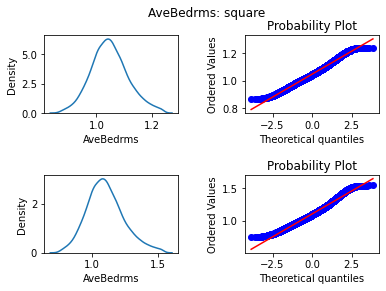

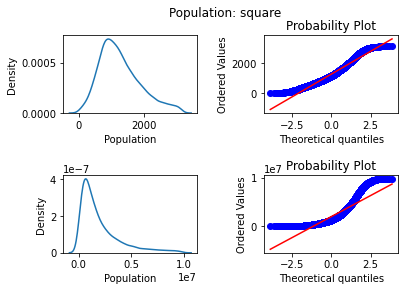

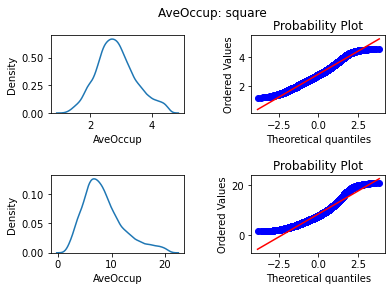

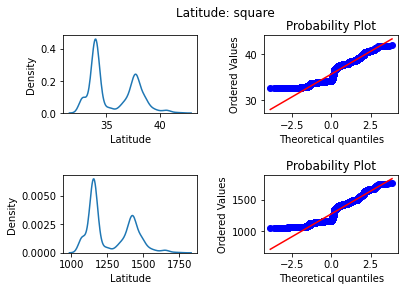

In [18]:
transformer_list = [fet.LogTransformer(), fet.ReciprocalTransformer(), fet.PowerTransformer(exp=0.5),
                   few.SklearnTransformerWrapper(PowerTransformer(method='box-cox')), fet.PowerTransformer(exp=2)]
transformer_names = ['logarithmic','reciprocal','square-root','box-cox','square']

result_names = []
result_test_stats = []
result_skewness = []
result_kurtosis = []
result_columns = []
result_critical_value=[]

for transformer, name in zip(transformer_list, transformer_names):
    X_transformed = transformer.fit_transform(X_train_no_outliers)
    for column in X_transformed.columns:
        f, ax = plt.subplots(2,2)
        sns.kdeplot(data=X_train_no_outliers, x=column,ax=ax[0][0])
        st.probplot(X_train_no_outliers[column], plot=ax[0][1])
        sns.kdeplot(data=X_transformed, x=column,ax=ax[1][0])
        st.probplot(X_transformed[column], plot=ax[1][1])
        plt.subplots_adjust(wspace=0.5, hspace=0.8)
        plt.suptitle(f"{column}: {name}")
        plt.show()
        result_columns.append(column)
        result_names.append(name)
        result_test_stats.append(st.anderson(X_transformed[column])[0])
        result_critical_value.append(st.anderson(X_transformed[column])[1][2])
        result_skewness.append(np.round(X_transformed[column].skew(),6))
        result_kurtosis.append(np.round(X_transformed[column].kurt(),6))

In [19]:
results = pd.DataFrame([pd.Series(result_columns), pd.Series(result_names),pd.Series(result_test_stats),
                        pd.Series(result_critical_value),pd.Series(result_skewness),pd.Series(result_kurtosis)]).T
results.columns = ['Variable','Transformation_Type', 'Test-stats','Critical value','Skewness','Kurtosis']
results.sort_values(['Variable','Test-stats'])

,Variable,Transformation_Type,Test-stats,Critical value,Skewness,Kurtosis
24,AveBedrms,box-cox,3.237787,0.787,0.000227,-0.033047
10,AveBedrms,reciprocal,3.842229,0.787,0.13285,0.01403
3,AveBedrms,logarithmic,4.486319,0.787,0.05538,-0.038063
17,AveBedrms,square-root,8.62919,0.787,0.148744,-0.027274
31,AveBedrms,square,36.269369,0.787,0.427027,0.147472
26,AveOccup,box-cox,5.891125,0.787,-0.004648,-0.155016
19,AveOccup,square-root,7.088731,0.787,0.037111,-0.168128
5,AveOccup,logarithmic,12.192732,0.787,-0.286515,0.056731
12,AveOccup,reciprocal,125.352868,0.787,1.020864,1.642968
33,AveOccup,square,172.792635,0.787,0.894409,0.565334


From the results above, only AveRooms variable is gaussian distributed after box-cox transformation since its test statistic is less than critical value from anderson test.

In [20]:
transformer = few.SklearnTransformerWrapper(PowerTransformer(method='box-cox'), variables='AveRooms')
X_train_transformed = transformer.fit_transform(X_train_no_outliers)
X_test_transformed = transformer.transform(X_test_no_outliers)

In [21]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_transformed), columns=X_train_transformed.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_transformed), columns=X_test_transformed.columns)

In [22]:
# Original model without any feature engineering
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_train_predict = regressor.predict(X_train)
y_test_predict = regressor.predict(X_test)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train_predict, y_train))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test_predict, y_test))}')
print(f'Train MAE: {mean_absolute_error(y_train_predict, y_train)}')
print(f'Test MAE: {mean_absolute_error(y_test_predict, y_test)}')

Train RMSE: 0.7192359392228439
Test RMSE: 0.7369864089681194
Train MAE: 0.5293466964613612
Test MAE: 0.536181814064185


In [23]:
# After resolving multicollinearity
regressor = LinearRegression()
regressor.fit(X_train_sub, y_train)
y_train_predict = regressor.predict(X_train_sub)
y_test_predict = regressor.predict(X_test_sub)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train_predict, y_train))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test_predict, y_test))}')
print(f'Train MAE: {mean_absolute_error(y_train_predict, y_train)}')
print(f'Test MAE: {mean_absolute_error(y_test_predict, y_test)}')

Train RMSE: 0.771742943686364
Test RMSE: 0.8038674962604246
Train MAE: 0.5691363701061698
Test MAE: 0.5799263599270105


In [24]:
# After resolving multicollinearity and removing outliers
regressor = LinearRegression()
regressor.fit(X_train_no_outliers, y_train_no_outliers)
y_train_predict = regressor.predict(X_train_no_outliers)
y_test_predict = regressor.predict(X_test_no_outliers)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train_predict, y_train_no_outliers))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test_predict, y_test_no_outliers))}')
print(f'Train MAE: {mean_absolute_error(y_train_predict, y_train_no_outliers)}')
print(f'Test MAE: {mean_absolute_error(y_test_predict, y_test_no_outliers)}')

Train RMSE: 0.6843167166921628
Test RMSE: 0.687225843841563
Train MAE: 0.5127442095032775
Test MAE: 0.5111436838365765


In [25]:
# After resolving multicollinearity, removing outliers and feature transformation
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train_no_outliers)
y_train_predict = regressor.predict(X_train_transformed)
y_test_predict = regressor.predict(X_test_transformed)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train_predict, y_train_no_outliers))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test_predict, y_test_no_outliers))}')
print(f'Train MAE: {mean_absolute_error(y_train_predict, y_train_no_outliers)}')
print(f'Test MAE: {mean_absolute_error(y_test_predict, y_test_no_outliers)}')

Train RMSE: 0.6831860221504514
Test RMSE: 0.6861794821487921
Train MAE: 0.5116340320997406
Test MAE: 0.5100281642877182


In [26]:
# After resolving multicollinearity, removing outliers, feature transformation and feature scaling
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train_no_outliers)
y_train_predict = regressor.predict(X_train_scaled)
y_test_predict = regressor.predict(X_test_scaled)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train_predict, y_train_no_outliers))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test_predict, y_test_no_outliers))}')
print(f'Train MAE: {mean_absolute_error(y_train_predict, y_train_no_outliers)}')
print(f'Test MAE: {mean_absolute_error(y_test_predict, y_test_no_outliers)}')

Train RMSE: 0.6831860221504514
Test RMSE: 0.6861794821487921
Train MAE: 0.5116340320997406
Test MAE: 0.5100281642877184


By comparing root mean squared errors, the regression model performs best after resolving multicollinearity issue, removing outliers and performing feature transformation on AveRooms variable.

The following sections below evaluates the results from using various feature-selection techniques, while identifying for any model performance improvements by using a subset of features.

In [27]:
# F regression
selector = SelectKBest(score_func=f_regression,k=7)
selector.fit(X_train_scaled,y_train_no_outliers)
f_result = pd.Series(selector.scores_, index=X_train_scaled.columns)
f_result.name = 'F-regression'
f_result.sort_values(ascending=False)

MedInc        7784.307555
AveOccup      1397.330731
AveRooms       757.441825
Latitude       250.820369
HouseAge       190.281914
AveBedrms       51.572793
Population      19.015573
Name: F-regression, dtype: float64

In [28]:
# Mutual information
selector = SelectKBest(score_func=mutual_info_regression,k=7)
selector.fit(X_train_scaled,y_train_no_outliers)
mi_result = pd.Series(selector.scores_, index=X_train_scaled.columns)
mi_result.name = 'Mutual information'
mi_result.sort_values(ascending=False)

Latitude      0.392572
MedInc        0.325356
AveOccup      0.082015
AveRooms      0.080334
HouseAge      0.037122
Population    0.017391
AveBedrms     0.002860
Name: Mutual information, dtype: float64

In [29]:
# Extra Trees Regression
selector = ExtraTreesRegressor().fit(X_train_scaled,y_train_no_outliers)
et_result = pd.Series(selector.feature_importances_,index=X_train_scaled.columns)
et_result.name = 'Extra Trees'
et_result.sort_values(ascending=False).head(10)

MedInc        0.440517
AveOccup      0.169630
HouseAge      0.101508
Latitude      0.099932
AveRooms      0.085802
AveBedrms     0.052246
Population    0.050365
Name: Extra Trees, dtype: float64

In [30]:
# Using statistical method to analyze adjusted R-squared value
X_ = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train_no_outliers, X_)
results = model.fit()
print(results.summary())
print('')
print(f'Adjusted r squared value: {results.rsquared_adj}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     2429.
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:10:11   Log-Likelihood:                -12245.
No. Observations:               11797   AIC:                         2.451e+04
Df Residuals:                   11789   BIC:                         2.456e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0156      0.006    320.340      0.0

C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
# Removing one variable from features for comparing adjusted r-squared value to check for improvements if exist
r_squaredadj = []
for column in X_train_scaled.columns:
    model = sm.OLS(y_train_no_outliers, X_.drop([column],axis=1))
    results = model.fit()
    r_squaredadj.append(results.rsquared_adj)
    
results = pd.concat([pd.Series(X_train_scaled.columns), pd.Series(r_squaredadj)],
                    axis=1).rename({0:'Variable_Removed',1:'Adjusted R squared'},axis=1)
results.sort_values(by='Adjusted R squared',ascending=False)

,Variable_Removed,Adjusted R squared
4,Population,0.587961
6,Latitude,0.584966
3,AveBedrms,0.575523
2,AveRooms,0.557376
1,HouseAge,0.547457
5,AveOccup,0.531412
0,MedInc,0.282453


From the results above, removing one feature from the given set of features does not improve the adjusted R-squared value. Therefore, the current set of features provide the best performance for linear regression model.

The following section below checks if the target variable can be transformed into a gaussian distribution using various feature transformation techniques:

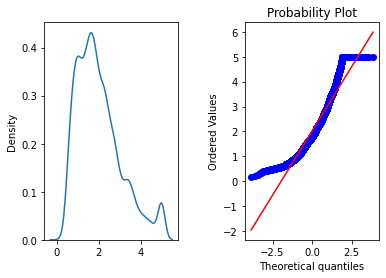

In [32]:
# Original distribution of target variable
f, ax = plt.subplots(1,2)
sns.kdeplot(data=y_train_no_outliers,ax=ax[0])
st.probplot(y_train_no_outliers, plot=ax[1])
plt.subplots_adjust(wspace=0.5, hspace=0.8)
plt.show()

In [33]:
# Anderson test on target variable
st.anderson(y_train_no_outliers)

AndersonResult(statistic=205.7824383828156, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Since test statistic is higher than critical value at 5% significance level, there is sufficient evidence to conclude that the target variable is not gaussian distributed.

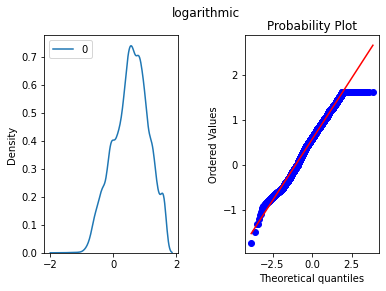

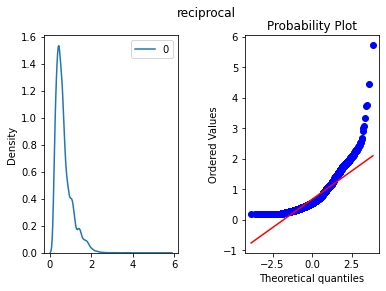

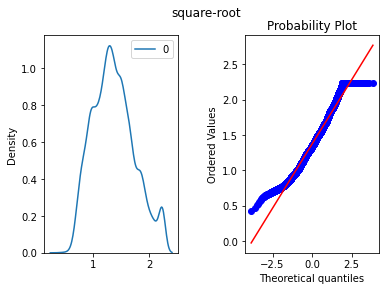

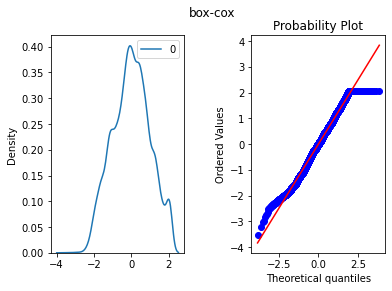

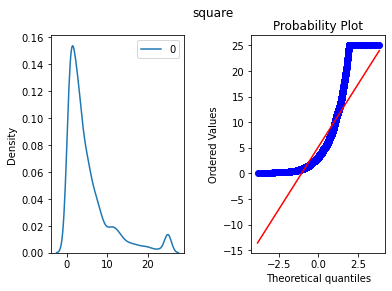

In [34]:
transformer_list = [fet.LogTransformer(), fet.ReciprocalTransformer(), fet.PowerTransformer(exp=0.5),
                   few.SklearnTransformerWrapper(PowerTransformer(method='box-cox')), fet.PowerTransformer(exp=2)]
transformer_names = ['logarithmic','reciprocal','square-root','box-cox','square']

result_names = []
result_test_stats = []
result_skewness = []
result_kurtosis = []
result_critical_value=[]

for transformer, name in zip(transformer_list, transformer_names):
    y_transformed = transformer.fit_transform(pd.DataFrame(y_train_no_outliers))
    f, ax = plt.subplots(1,2)
    sns.kdeplot(data=y_transformed,ax=ax[0])
    st.probplot(y_transformed[0], plot=ax[1])
    plt.subplots_adjust(wspace=0.5, hspace=0.8)
    plt.suptitle(f"{name}")
    plt.show()
    result_names.append(name)
    result_test_stats.append(st.anderson(y_transformed[0])[0])
    result_critical_value.append(st.anderson(y_transformed[0])[1][2])
    result_skewness.append(np.round(y_transformed[0].skew(),6))
    result_kurtosis.append(np.round(y_transformed[0].kurt(),6))

In [35]:
results = pd.DataFrame([pd.Series(result_names),pd.Series(result_test_stats),
                        pd.Series(result_critical_value),pd.Series(result_skewness),pd.Series(result_kurtosis)]).T

results.columns = ['Transformation_Type', 'Test-stats','Critical value','Skewness','Kurtosis']
results.sort_values(['Test-stats'])

,Transformation_Type,Test-stats,Critical value,Skewness,Kurtosis
3,box-cox,12.25014,0.787,-0.01669,-0.531325
0,logarithmic,24.229188,0.787,-0.224485,-0.450763
2,square-root,41.116472,0.787,0.37112,-0.384209
1,reciprocal,445.663291,0.787,1.715848,5.444212
4,square,830.809445,0.787,1.940595,3.632135


Since none of the transformation techniques above results in gaussian distribution, no transformation is required on the target variable.

The following section below involves using various regularization methods on linear regression models:

In [36]:
# LASSO regression
lassocv = LassoCV(cv=10, random_state=0, max_iter = 100).fit(X_train_scaled, y_train_no_outliers)
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train_scaled, y_train_no_outliers)
y_train_predict = lasso.predict(X_train_scaled)
y_test_predict = lasso.predict(X_test_scaled)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train_predict, y_train_no_outliers))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test_predict, y_test_no_outliers))}')
print(f'Train MAE: {mean_absolute_error(y_train_predict, y_train_no_outliers)}')
print(f'Test MAE: {mean_absolute_error(y_test_predict, y_test_no_outliers)}')

Train RMSE: 0.6831901895710846
Test RMSE: 0.6862610435857185
Train MAE: 0.5116262079435315
Test MAE: 0.5100643751145925


In [37]:
# Ridge regression
ridgecv = RidgeCV(cv=10).fit(X_train_scaled, y_train_no_outliers)
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train_scaled, y_train_no_outliers)
y_train_predict = ridge.predict(X_train_scaled)
y_test_predict = ridge.predict(X_test_scaled)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train_predict, y_train_no_outliers))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test_predict, y_test_no_outliers))}')
print(f'Train MAE: {mean_absolute_error(y_train_predict, y_train_no_outliers)}')
print(f'Test MAE: {mean_absolute_error(y_test_predict, y_test_no_outliers)}')

Train RMSE: 0.6831860391499364
Test RMSE: 0.6861830732338348
Train MAE: 0.5116358596669245
Test MAE: 0.510032704569567


In [38]:
# ElasticNet regression
elasticnetcv = ElasticNetCV(cv=10, l1_ratio=0.5).fit(X_train_scaled, y_train_no_outliers)
elasticnet = ElasticNet(alpha = elasticnetcv.alpha_)
elasticnet.fit(X_train_scaled, y_train_no_outliers)
y_train_predict = elasticnet.predict(X_train_scaled)
y_test_predict = elasticnet.predict(X_test_scaled)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train_predict, y_train_no_outliers))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test_predict, y_test_no_outliers))}')
print(f'Train MAE: {mean_absolute_error(y_train_predict, y_train_no_outliers)}')
print(f'Test MAE: {mean_absolute_error(y_test_predict, y_test_no_outliers)}')

Train RMSE: 0.6831947963752335
Test RMSE: 0.6862937252126394
Train MAE: 0.5116466266754465
Test MAE: 0.5101035959114644


## Linear Regression Assumption Checks

### Model Linearity

Using Rainbow test:

Null hypothesis: The linear specification of regression model is correct

Alternative hypothesis: The linear specification of regression model is incorrect.

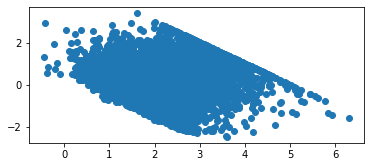

In [39]:
model = sm.OLS(y_train_no_outliers, X_train_scaled)
results = model.fit()
pred_val = results.fittedvalues.copy()
true_val = y_train_no_outliers.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

In [40]:
linear_test = sms.linear_rainbow(results)
print(f'F-test statistic: {linear_test[0]}')
print(f'p-value: {linear_test[1]}')

F-test statistic: 0.9960891967610037
p-value: 0.5597862982844402


Since p-value is greater than 0.05, there is insufficient evidence to conclude that the linear specification of the regression model is incorrect. Thus, the null hypothesis is not rejected.

### Homoscedasticity test

Using Breusch-Pagan test:

Null hypothesis: Homoscedasticity is present (Residuals are distributed with equal variance)

Alternative hypothesis: Homoscedasticity is not present (Residuals are distributed with unequal variance)

In [41]:
from statsmodels.compat import lzip
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 19.63814714215834),
 ('p-value', 0.0032112578769731134),
 ('f-value', 2.8084600863776017),
 ('f p-value', 0.006384781587313034)]

Since p-value is less than 0.05, there is sufficient evidence to conclude that homosedasticity is not present. Thus, the null hypothesis is rejected.

### Zero correlation between residuals

Using ljung-box test:

Null hypothesis: There is zero autocorrelation between residuals

Alternative hypothesis: There is some autocorrelation between residuals

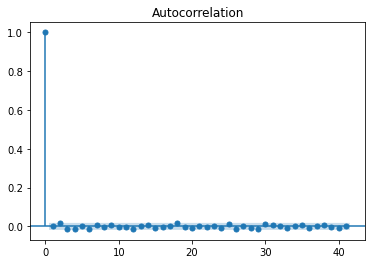

In [42]:
plot_acf(results.resid)
plt.show()

In [43]:
acorr_ljungbox(results.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.000140,0.990567
2,3.429137,0.180041
3,6.249881,0.100066
4,8.808470,0.066069
5,8.951073,0.111032
6,10.336929,0.111162
7,10.841033,0.145705
8,11.087527,0.196789
9,11.611719,0.236094
10,11.749544,0.302168


Since p-value is greater than 0.05 across all lag values, there is insufficient evidence to conclude there is some autocorrelation between residuals. Thus, the null hypothesis is not rejected.

### Exogeneity and No Multicollinearity

Using correlation heatmap, there should be no very strong correlation between features (No multicollinearity) and there should be very weak correlation between features and residuals (Exogeneity).

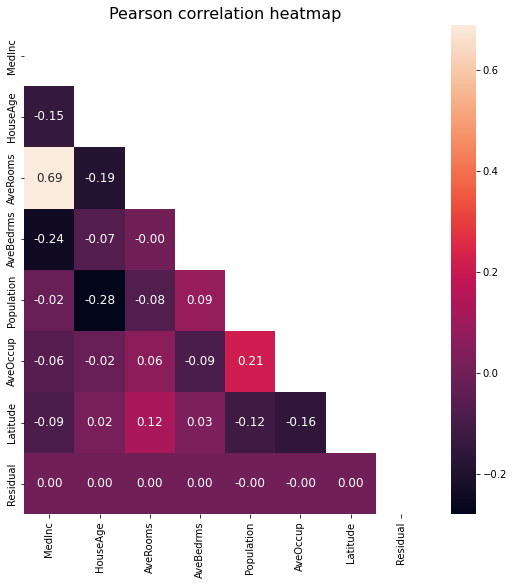

In [44]:
# Pearson correlation heatmap
correlation = pd.concat([X_train_scaled, pd.Series(results.resid, name='Residual')],axis=1).corr(method='pearson')
plt.figure(figsize=(9,9))
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation, dtype=bool)),fmt='.2f',annot_kws={'fontsize':12})
plt.title('Pearson correlation heatmap',size=16)
plt.show()

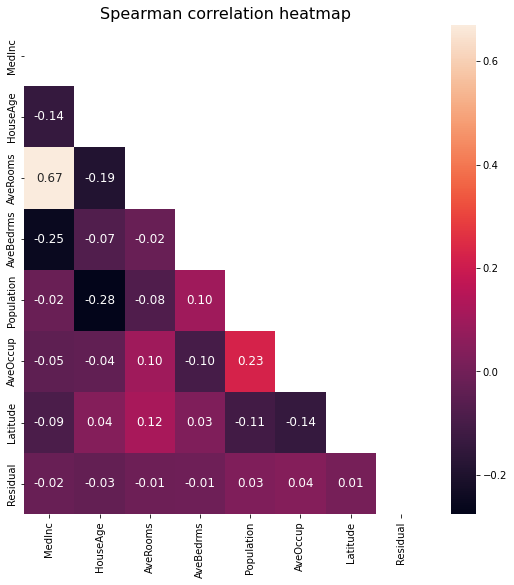

In [45]:
# Spearman correlation heatmap
correlation = pd.concat([X_train_scaled, pd.Series(results.resid, name='Residual')],axis=1).corr(method='spearman')
plt.figure(figsize=(9,9))
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation, dtype=bool)),fmt='.2f',annot_kws={'fontsize':12})
plt.title('Spearman correlation heatmap',size=16)
plt.show()

In [46]:
# Using variance inflation factor
X_combined = pd.concat([X_train_scaled, pd.Series(results.resid, name='Residual')],axis=1)
vif = [variance_inflation_factor(X_combined.values, i) for i in range(X_combined.shape[1])]
pd.DataFrame({'vif': vif}, index=X_combined.columns).T

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Residual
vif,2.431038,1.146106,2.360132,1.184865,1.192169,1.167407,1.138393,1.0


From both correlation heatmaps and variance inflation factor, there is no very strong correlation observed between features and residuals and variance inflation factor is less than 5 across all variables. Therefore, there is no concern of multicollinerity in the regression model.

### Normality of residual test with zero mean

Using Jarque-Bera test:

Null hypothesis: Residuals are normally distributed.

Alternative hypothesis: Residuals are not normally distributed.

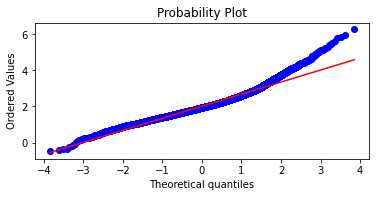

In [47]:
# Q-Q plot
fig, ax = plt.subplots(figsize=(6,2.5))
st.probplot(residual, plot=ax, fit=True)
plt.show()

In [48]:
name = ["Jarque-Bera Test statistic", "P-value", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera Test statistic', 3755.2305096080518),
 ('P-value', 0.0),
 ('Skew', 0.9097765880933422),
 ('Kurtosis', 5.080607003772367)]

In [49]:
# Mean of residual
results.resid.mean()

2.0156356726286337

Since p-value is less than 0.05, there is sufficient evidence to conclude that the residuals of the regression model are not normally distributed. Thus, the null hypothesis is rejected. In addition, the mean of residuals are not close to zero.

# Polynomial Regression

Note that all points related to Linear Regression is also applicable for Polynomial regression, except that Polynomial regression greatly increases model complexity which may be more prone to model overfitting.

In [50]:
train_rmse = []
test_rmse = []
for degree in range(1,6):
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly = pd.DataFrame(poly.fit_transform(X), columns = poly.get_feature_names_out(X.columns))
    X_train, X_test, y_train, y_test = train_test_split(X_poly,y,test_size=0.3, random_state=0)
    transformer = DropCorrelatedFeatures(threshold=0.8)
    X_train_sub = transformer.fit_transform(X_train)
    X_test_sub = transformer.transform(X_test)
    # Checking for gaussian distribution of numerical variables using anderson test
    gaussian_columns = []
    non_gaussian_columns = []
    for column in X_train_sub.columns:
        result = st.anderson(X_train_sub[column])
        if result[0] > result[1][2]:
            non_gaussian_columns.append(column)
        else:
            gaussian_columns.append(column)
    # Trimming outliers using IQR method
    X_train_no_outliers = X_train_sub.copy()
    X_test_no_outliers = X_test_sub.copy()
    trimmer = feo.OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5)
    X_train_no_outliers[non_gaussian_columns] = trimmer.fit_transform(X_train_no_outliers[non_gaussian_columns])
    X_test_no_outliers[non_gaussian_columns] = trimmer.transform(X_test_no_outliers[non_gaussian_columns])
    index_values = X_train_no_outliers.dropna().index
    X_train_no_outliers = X_train_no_outliers.dropna().reset_index(drop=True)
    y_train_no_outliers = y_train[index_values].copy().reset_index(drop=True)
    index_values = X_test_no_outliers.dropna().index
    X_test_no_outliers = X_test_no_outliers.dropna().reset_index(drop=True)
    y_test_no_outliers = y_test[index_values].copy().reset_index(drop=True)
    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_no_outliers), columns=X_train_no_outliers.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test_no_outliers), columns=X_test_no_outliers.columns)
    # Regression model training
    regressor = LinearRegression()
    regressor.fit(X_train_scaled, y_train_no_outliers)
    y_train_predict = regressor.predict(X_train_scaled)
    y_test_predict = regressor.predict(X_test_scaled)
    train_rmse.append(np.sqrt(mean_squared_error(y_train_predict, y_train_no_outliers)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test_predict, y_test_no_outliers)))

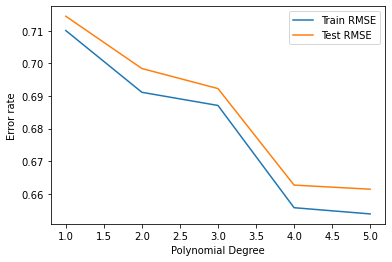

In [51]:
plt.plot(range(1,6),train_rmse, label="Train RMSE")
plt.plot(range(1,6),test_rmse, label="Test RMSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("Error rate")
plt.legend()
plt.show()